# OpenCV图像处理

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 使用Numpy生成一张图像

In [2]:
imgs = np.zeros([100, 100, 3], dtype=np.uint8)
imgs.shape

(100, 100, 3)

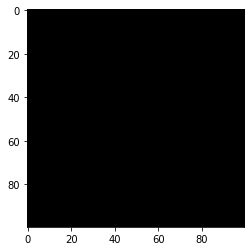

In [3]:
plt.imshow(imgs)
plt.show()

In [4]:
imgs[:,:,0] = 255
imgs[:,:,1] = 255

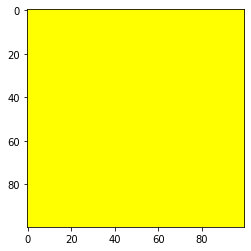

In [5]:
plt.imshow(imgs)
plt.show()

## 2. opencv计算机视觉

In [6]:
import cv2

### 2.1 读取彩色图像
在OpenCV中，通过 `cv2.imread()` 函数读入图像数据，其基本使用格式：`cv2.imread(filename[, flags])`。

|参数名称|说明|
|--|--|
|filename|接收str。表示待读取图像的路径。无默认值|
|flags|接收读取模式。表示读取图像的模式，默认为cv2.IMREAD_COLOR|

In [7]:
img = cv2.imread('../imgs/lenna.jpg')

- 在默认情况下，通过 cv2.imread() 函数读入图像数据为3通道的彩色图，像素值为8位的非负整数，图像数据以Numpy中ndarray的方式存在；
- 如果定义了 cv2.imread() 读入模式为 cv2.IMREAD_CRAYSCALE，那么读入图像为单通道的**灰度图**；
- 通过OpenCV读入彩色图像数据的颜色通道顺序为BGR（蓝、绿、红）并非常用的RGB（红、绿、蓝）顺序

### 2.2 显示彩色图像
#### 使用 opencv 展示图像

图像属性：
- 在OpenCV中，读取到的图像数组维度可以表示为：（高，宽，通道数）；
- 用OpenCV的shape返回的是（100，300，3），对应图像的行数、列数、通道数

In [8]:
img.shape

(377, 373, 3)

在OpenCV中，通过 cv2.imshow() 函数显示图像数据，其基本使用格式：`cv2.imshow(winname, img)`。

|参数名称|说明|
|--|--|
|winname|接收str。表示显示图像的窗口名称，无默认值|
|img|接收array。表示显示的图像对象，无默认值|

notes: OpenCV的imshow之后是不能成功显示图片的，需要后面加一句cv2.waitKey(0)，释放所有窗口：cv2.destroyAllWindows()

In [9]:
cv2.imshow('Lenna', img)
key = cv2.waitKey(0)
if key == ord('q'): # 返回对应字符的ASCII十进制值
    print('Shut Down!')
else:
    print('Continue!')
cv2.destroyWindow('Lenna')

Shut Down!


通过 cv2.waitKey() 函数设置图片窗口显示时长，其基本使用格式：`cv2.waitKey([, delay])`。

|参数名称|说明|
|--|--|
|delay|接收int。表示延迟时间，单位为毫秒，无默认值|

- waitKey作用是图像显示时，等待用户按键触发，如果用户按键触发或时间超过了设置的时间则退出图片展示；
- cv2.waitKey(0) 的作用是令程序一直停留在显示图像的状态。如果没有增加 cv2.waitKey(0)，那么程序运行完毕后，图像显示窗口会自动关闭，即一闪而逝。

#### 使用 matplotlib 展示图像

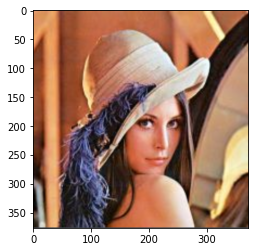

In [10]:
plt.imshow(img[:,:,::-1]) # 从BGR变成RGB
plt.show()

### 2.3 写出图像

在OpenCV中，通过cv2.imwrite()函数保存图像数据，其基本使用格式：`cv2.imwrite(filename, img)`。

|参数名称|说明|
|--|--|
|filename|接收str。表示写出图像的文件名，无默认值|
|img|接收array。表示写出图像数据，无默认值|

In [11]:
cv2.imwrite('../imgs/lenna_copy.jpg', img)

True

## 3. 图像几何变换

### 3.1 图像的平移

In [16]:
M = np.array([[1, 0, 50], [0, 1, 100]], dtype=np.float32) # 向右移动50个像素，向下移动100个像素

In [17]:
img_new = cv2.warpAffine(img, M, dsize=img.shape[:2])

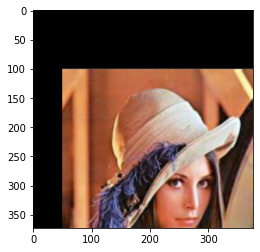

In [18]:
plt.imshow(img_new[:,:,::-1])
plt.show()

### 3.2 图像的旋转

In [21]:
rotation_M = cv2.getRotationMatrix2D(center=(img.shape[0]//2, img.shape[1]//2), angle=10, scale=0.8) # center: 旋转中心, angle: 旋转的角度（默认逆时针）, scale: 缩放比例（以1为基准，比1小时会缩小图像，比1大时会放大图像）
rotation_M

array([[ 0.7878462 ,  0.13891854, 14.04606511],
       [-0.13891854,  0.7878462 , 65.57729227]])

In [22]:
new_img = cv2.warpAffine(img, rotation_M, dsize=img.shape[:2])

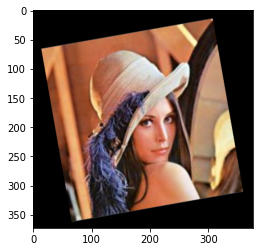

In [23]:
plt.imshow(new_img[:,:,::-1])
plt.show()

### 3.3 图像缩放

In [24]:
new_img = cv2.resize(img, (400, 400))

In [25]:
new_img.shape

(400, 400, 3)

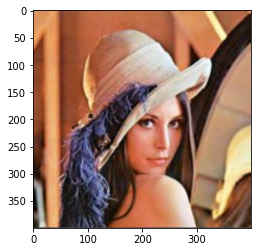

In [26]:
plt.imshow(new_img[:,:,::-1])
plt.show()